In [2]:
!pip install pulp
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 1.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 19.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 19.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=273702 sha256=880f2a84750a61b86032be70ff6280c2cff436d25d31750e00485acd32a32154
  Stored in directory: /home/jovyan/.cache/pip/wheels/f3/60/5b/41a9bbd32037a7211f550249f5dc798e55c20d42c49deeaf25
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
      Succe

In [1]:
!pip install cvxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.0/299.0 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 44.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.3 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'yfinance'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import cvxpy as cp
import scipy.linalg as la
import pulp

## how we load data from yahoo finance

#### Short-term corporate bond data

In [9]:

T = 1 # Number of days in time period
R1 = []
cor_bonds = ["SCHJ","IGSB","VCSH","SPSB","SLQD","ICSH"]

for bond in cor_bonds:
    data = yf.Ticker(bond)
    # 我先改成1年， 这个之后可以随时改成想要的时段
    bond = data.history(period="1y")

    # close values on that day
    close = bond['Close'].values

    # convert day to day close values to return
    returns = (close[T:] - close[:-T])/close[:-T]
    R1.append(returns)

R1 = np.array(R1).T
r1 = np.mean(R1,axis=0)
S1 = np.cov(R1.T)
R1

array([[ 0.00126159,  0.00098998,  0.0011813 ,  0.00135285,  0.        ,
         0.00019916],
       [ 0.00178517,  0.00197768,  0.00196681,  0.00135082,  0.00247676,
         0.00039865],
       [-0.00199142, -0.00256621, -0.00222454, -0.00168638, -0.00185298,
        -0.00019928],
       ...,
       [-0.00104   , -0.00117619, -0.00116995, -0.00067471, -0.00081635,
         0.00019846],
       [ 0.00110351,  0.00117758,  0.00143155,  0.00101279,  0.00122552,
         0.00019849],
       [-0.00546972, -0.0056851 , -0.00571793, -0.00404718, -0.00448799,
        -0.00069444]])

#### Stock data

In [99]:
T = 1 # Number of days in time period
R = []
assets = ["AAPL","EA","MSFT","NFLX","GOOGL","TSLA"]

for stock in assets:
    data = yf.Ticker(stock)
    # 我先改成1年， 这个之后可以随时改成想要的时段
    df = data.history(period="1y")

    # close values on that day
    close = df['Close'].values

    # convert day to day close values to return
    returns = (close[T:] - close[:-T])/close[:-T]
    R.append(returns)

R = np.array(R).T
r = np.mean(R,axis=0)
S = np.cov(R.T)

In [100]:
R

array([[-0.00435327,  0.00358049,  0.00233358, -0.02122939, -0.00673943,
        -0.03346004],
       [ 0.03410362,  0.01704586,  0.02239938,  0.04579646,  0.02666285,
         0.02968872],
       [-0.00211396, -0.00319602, -0.0127656 , -0.02183771,  0.0134041 ,
        -0.00484128],
       ...,
       [-0.00666355, -0.00222575, -0.00218554, -0.01221356,  0.01540988,
         0.04899941],
       [ 0.00724251,  0.00530771,  0.00398032, -0.01624729,  0.01130126,
         0.02254601],
       [-0.01113927, -0.01063585, -0.00708452,  0.0006147 , -0.00293746,
        -0.02894624]])

## tesla in past 1 years

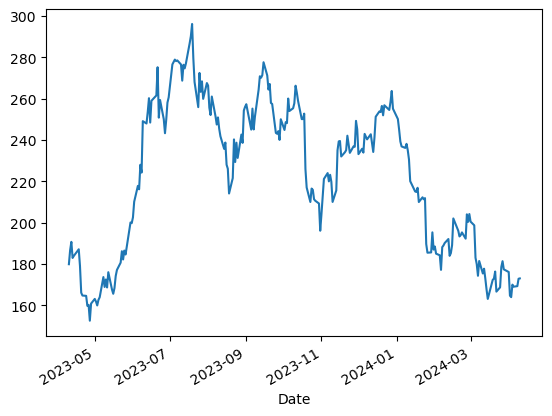

In [8]:
# last df is Tesla
df['Open'].plot()
plt.show()

## histogram of Tesla in past 1 years

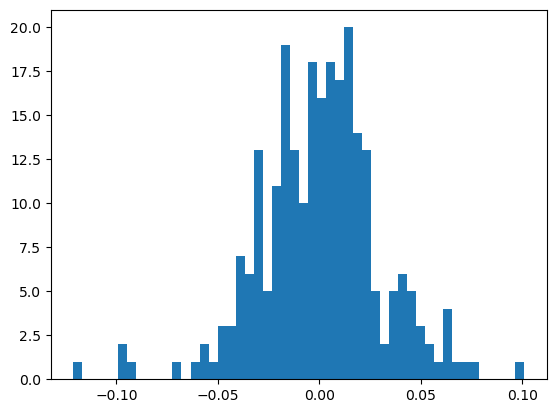

In [9]:
return_TSLA = R[:,-1]
plt.hist(return_TSLA,bins=50)
plt.show()

In [10]:
r

array([0.00023118, 0.00018604, 0.00161706, 0.00262249, 0.00165902,
       0.00013371])

In [11]:
S

array([[1.46487467e-04, 4.51157850e-05, 8.21791152e-05, 9.53603279e-05,
        9.42188118e-05, 1.32088499e-04],
       [4.51157850e-05, 1.24517103e-04, 3.93550841e-05, 4.06832438e-05,
        3.81615653e-05, 9.09659282e-05],
       [8.21791152e-05, 3.93550841e-05, 1.92515116e-04, 1.22772696e-04,
        1.00013200e-04, 1.06801511e-04],
       [9.53603279e-05, 4.06832438e-05, 1.22772696e-04, 5.01255059e-04,
        1.14221919e-04, 1.24699021e-04],
       [9.42188118e-05, 3.81615653e-05, 1.00013200e-04, 1.14221919e-04,
        2.92762801e-04, 1.35050530e-04],
       [1.32088499e-04, 9.09659282e-05, 1.06801511e-04, 1.24699021e-04,
        1.35050530e-04, 9.07600181e-04]])

# We consider risk as MAD first, all these models are model 1x




# model 1A
when we minimize MAD under a specified expected return $r_0$
$$
\begin{gathered}
\operatorname{maximize} -\frac{1}{T} \sum_{t=1}^T\left|\sum_j x_j\left(R_j(t)-r_j\right)\right| \\
\text { subject to } \sum_j x_j=1 \\
  \sum_j x_j r_j = r_0 \\
x_j \geq 0 \quad j=1,2, \ldots, n, \\
r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$

The LP version is
$$
\begin{gathered}
& \operatorname{maximize} -\frac{1}{T} \sum_{t=1}^T y_t \\
& \text { subject to }-y_t \leq \sum_j x_j\left(R_j(t)-r_j\right) \leq y_t \quad t=1,2, \ldots, T \text {, } \\
& \sum_j x_j=1 \\
&  \sum_j x_j r_j = r_0 \\
& x_j \geq 0 \quad j=1,2, \ldots, n, \\
& r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$





In [101]:
from pulp import *

# Define the data
n = len(assets)  # Number of assets
T = len(R[:,0])  # Number of time periods
r0 = 0.0008
print(n,T,r0)


# Create a LP problem
prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob +=  - (1/T) * lpSum(y[t] for t in range(T)), "Objective"

# Define constraints
for t in range(T):
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

prob += lpSum(r[j] * x[j] for j in range(n)) == r0

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("expected return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value( (1/T) * lpSum(y[t] for t in range(T))))


6 251 0.0008
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/93c569bd181c452ca1488480fd25bcdd-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/93c569bd181c452ca1488480fd25bcdd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 509 COLUMNS
At line 4287 RHS
At line 4792 BOUNDS
At line 4793 ENDATA
Problem MODEL has 504 rows, 257 columns and 3526 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 445 (-59) rows, 257 (0) columns and 3113 (-413) elements
Perturbing problem by 0.001% of 0.027446908 - largest nonzero change 4.987799e-05 ( 7.1574397%) - largest zero change 4.2399266e-05
0  Obj -0 Primal inf 0.65570077 (2)
45  Obj -0.0009054432 Primal inf 76.03613 (231)
92  Obj -0.0022363844 Primal inf 80.280239 (212)
139  Obj -0.0034727426 Primal inf 172.06242 (199)
188  Obj 

# model 1B
when we maximize return under a specified MAD constrait $m_0$
$$
\begin{gathered}
\operatorname{maximize} \sum_j x_j r_j  \\
\text { subject to } \sum_j x_j=1 \\
  \frac{1}{T} \sum_{t=1}^T\left|\sum_j x_j\left(R_j(t)-r_j\right)\right| \leq m_0 \\
x_j \geq 0 \quad j=1,2, \ldots, n, \\
r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$

The LP version is
$$
\begin{gathered}
& \operatorname{maximize}  \sum_j x_j r_j   \\
& \text { subject to }-y_t \leq \sum_j x_j\left(R_j(t)-r_j\right) \leq y_t \quad t=1,2, \ldots, T \text {, } \\
& \sum_j x_j=1 \\
& \frac{1}{T} \sum_{t=1}^T y_t \leq m_0  \\
& x_j \geq 0 \quad j=1,2, \ldots, n, \\
& r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$





In [13]:
from pulp import *

# Define the data
n = len(assets)  # Number of assets
T = len(R[:,0])  # Number of time periods
m0 = 0.007
print(n,T,r0)


# Create a LP problem
prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob += lpSum(r[j] * x[j] for j in range(n)), "Objective"

# Define constraints
for t in range(T):
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

prob +=  (1/T) * lpSum(y[t] for t in range(T)) <= m0, "Risk"

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("expected return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value( (1/T) * lpSum(y[t] for t in range(T))))


6 252 0.0008
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/036d8cc7898545799dbbec5172562ae5-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/036d8cc7898545799dbbec5172562ae5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 511 COLUMNS
At line 4304 RHS
At line 4811 BOUNDS
At line 4812 ENDATA
Problem MODEL has 506 rows, 258 columns and 3786 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 445 (-61) rows, 258 (0) columns and 3359 (-427) elements
Perturbing problem by 0.001% of 0.026105018 - largest nonzero change 0.00011218616 ( 35.760766%) - largest zero change 9.9568997e-05
0  Obj -0 Primal inf 13.205664 (2) Dual inf 0.057853972 (6)
50  Obj 0.0066513111 Primal inf 4247.4387 (236)
81  Obj 0.0032928301 Primal inf 51.179417 (177)
121  Obj 0.002055181 Primal inf 244

## model 1C
when combine return and risk together with $\mu$

$$
\begin{gathered}
\operatorname{maximize} \mu \sum_j x_j r_j-\frac{1}{T} \sum_{t=1}^T\left|\sum_j x_j\left(R_j(t)-r_j\right)\right| \\
\text { subject to } \sum_j x_j=1 \\
x_j \geq 0 \quad j=1,2, \ldots, n, \\
r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$

The LP version is
$$
\begin{aligned}
& \operatorname{maximize} \mu \sum_j x_j r_j-\frac{1}{T} \sum_{t=1}^T y_t \\
& \text { subject to }-y_t \leq \sum_j x_j\left(R_j(t)-r_j\right) \leq y_t \quad t=1,2, \ldots, T \text {, } \\
& \sum_j x_j=1 \\
& x_j \geq 0 \quad j=1,2, \ldots, n \\
& y_t \geq 0 \quad t=1,2, \ldots, T . \\
&
\end{aligned}
$$

below is pulp implementation

In [14]:
from pulp import *

# Define the data
n = len(assets)  # Number of assets
T = len(R[:,0])  # Number of time periods
mu = 1
print(n,T,mu)


# Create a LP problem
prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob += lpSum(r[j] * x[j] for j in range(n)) * mu - (1/T) * lpSum(y[t] for t in range(T)), "Objective"

# Define constraints
for t in range(T):
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("expected return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value( (1/T) * lpSum(y[t] for t in range(T))))


6 252 1
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/75a47ce1b67d409c9cea06237d32cf43-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/75a47ce1b67d409c9cea06237d32cf43-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 510 COLUMNS
At line 4303 RHS
At line 4809 BOUNDS
At line 4810 ENDATA
Problem MODEL has 505 rows, 258 columns and 3534 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 444 (-61) rows, 258 (0) columns and 3107 (-427) elements
Perturbing problem by 0.001% of 0.02615301 - largest nonzero change 8.1804922e-05 ( 35.760766%) - largest zero change 0
0  Obj -0 Primal inf 0.25985563 (1) Dual inf 0.05779028 (6)
46  Obj -0.00029031063 Primal inf 52.01481 (226)
90  Obj -0.0017258286 Primal inf 180.29466 (205)
136  Obj -0.0033554668 Primal inf 482.74958 (228)
1

# Efficient frontier

Let us use model 1B to compute the efficient frontier

In [20]:
from pulp import *

# Define the data
n = len(assets)  # Number of assets
T = len(R[:,0])  # Number of time periods

m0_array = np.linspace(0.0,0.01,50)
risk_array = 0. * m0_array
i = 0
for i in range(len(m0_array)):

  # Define the data
  n = len(assets)  # Number of assets
  T = len(R[:,0])  # Number of time periods
  r0 = m0_array[i]

  # Create a LP problem
  prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

  # Define decision variables
  x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
  y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

  # Define objective function
  prob +=  - (1/T) * lpSum(y[t] for t in range(T)), "Objective"

  # Define constraints
  for t in range(T):
      prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
      prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

  prob += lpSum(r[j] * x[j] for j in range(n)) == r0

  prob += lpSum(x) == 1, "Sum_of_weights"

  # Solve the problem
  prob.solve()
  risk_array[i] = value( (1/T) * lpSum(y[t] for t in range(T)))

print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("expected return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value( (1/T) * lpSum(y[t] for t in range(T))))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/474bd9efcf6a4a0182c9812787e8386a-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/474bd9efcf6a4a0182c9812787e8386a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 511 COLUMNS
At line 4304 RHS
At line 4811 BOUNDS
At line 4812 ENDATA
Problem MODEL has 506 rows, 258 columns and 3540 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
Perturbing problem by 0.001% of 0.02615301 - largest nonzero change 5.0600604e-06 ( 0.99595923%) - largest zero change 4.2498489e-06
0  Obj -0 Primal inf 0.25985653 (1)
36  Obj -0.0010304185 Primal inf 337.26582 (253)
89  Obj -0.0033157766 Primal inf 220.01279 (222)
142  Obj -0

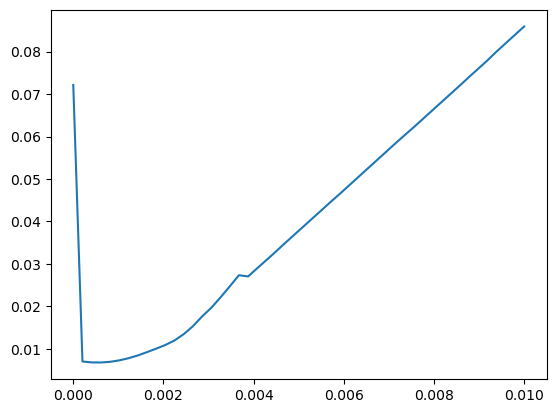

In [16]:
plt.figure()
plt.plot(m0_array, risk_array)

# Now we consider risk as total variance of the portfolio, all these models are model 2x


# model 2A
when we minimize variance under a specified expected return $r_0$
$$
\begin{gathered}
\operatorname{maximize} -\frac{1}{T} \sum_{t=1}^T\left(\sum_j x_j\left(R_j(t)-r_j\right)\right)^2 \\
\text { subject to } \sum_j x_j=1 \\
  \sum_j x_j r_j = r_0 \\
x_j \geq 0 \quad j=1,2, \ldots, n, \\
r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$

In [124]:
# centered return
R_c = 0. * R
for j in range(len(R[0,:])):
  R_c[:,j] = R[:,j] - r[j]

#print(np.outer(R_c[0,:],R_c[0,:]))
R_c.T @ R_c

# compute the convariance matrix manually
sig = 0. * S
for i in range(len(R[:,0])):
  sig = sig + np.outer(R_c[i,:],R_c[i,:])
sig = sig / T


r0 = 0.0005
n = len(R[0,:])
e = np.ones((n,1))
rq = r.reshape(n,1)

X = cp.Variable((n,1))
Objective = cp.Minimize(cp.quad_form(X,sig))
constraints = [e.T@X == 1, X >= 0, rq.T@X >= r0]
problem = cp.Problem(Objective,constraints)

result = problem.solve()

print("expected portfolio", X.value.T)
print("expected return :", (rq.T @ X.value)[0] )
print("Mean variance:", (X.value.T @ sig @ X.value)[0] )


ValueError: Quadratic form matrices must be symmetric/Hermitian.

## Optimization Problem

Choose a risk tolerance $q > 0$:

\begin{align*}
\text{minimize:} \ \ & \mathbf{x}^T \Sigma \mathbf{x} - q \mathbf{r}^T \mathbf{x} \\
\text{subject to:} \ \ & \mathbf{e}^T \mathbf{x} = 1 \\
& \mathbf{x} \geq 0 \\
\end{align*}

In [18]:
n = len(assets)
q = 0.1
e = np.ones(n)
X = cp.Variable(n)

obj = cp.Minimize(cp.quad_form(X,S) - q*r@X)
constraints = [e@X == 1, X >= 0]
problem = cp.Problem(obj,constraints)

result = problem.solve()
X.value

array([-8.92537482e-23,  2.03972387e-01,  3.91119814e-01,  1.96348712e-01,
        2.08559087e-01,  7.67512689e-24])

## Optimization Problem

\begin{align*}
\text{minimize:} \ \ & \mathbf{x}^T \Sigma \mathbf{x} \\
\text{subject to:} \ \ & \mathbf{e}^T \mathbf{x} = 1 \\
& \mathbf{r}^T \mathbf{x} = \mu \\
& \mathbf{x} \geq 0 \\
\end{align*}

case mu = 0.01,   minimize risk sigma = 0.001

case mu = 0.02,  minimize risk sigma = 0.003

case mu = 0.05,  minimize risk  sigma = 0.010



In [19]:
n = len(assets)
e = np.ones((n,1))
r = r.reshape(n,1)
mu = 0.001

M = np.block([[2*S,-r,-e],[r.T,0,0],[e.T,0,0]])
b = np.block([[np.zeros((n,1))],[mu],[1]])

x = la.solve(M,b)

# Data Processing - New Try

In [32]:
from datetime import datetime, timedelta, date

## Metal Only

In [75]:
gold = pd.read_csv('gold prices.csv')
silver = pd.read_csv('silver prices.csv')

In [77]:
gold.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/17/2023,1915.2,146770.0,1922.4,1933.5,1914.2
1,08/16/2023,1928.3,124766.0,1933.1,1938.2,1922.0
2,08/15/2023,1935.2,161512.0,1939.4,1944.3,1927.5
3,08/14/2023,1944.0,117514.0,1945.6,1948.2,1934.2
4,08/11/2023,1946.6,119090.0,1944.9,1953.6,1942.7


In [78]:
silver.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/17/2023,23.042,11441.0,22.800,23.385,22.725
1,08/16/2023,22.856,10802.0,22.905,23.170,22.770
2,08/15/2023,22.656,60396.0,22.650,22.770,22.265
3,08/14/2023,22.708,51908.0,22.740,22.820,22.410
4,08/11/2023,22.743,48043.0,22.760,22.910,22.610


In [79]:
# Convert 'Date' to Datetime
gold['Date'] = pd.to_datetime(gold['Date'])
gold = gold.set_index('Date')

silver['Date'] = pd.to_datetime(silver['Date'])
silver = silver.set_index('Date')

In [24]:
gold.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2
2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0
2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5
2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2
2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7


In [80]:
gold.rename(columns={"Close/Last": "GOLD"}, inplace=True)
silver.rename(columns={"Close/Last": "SILVER"}, inplace=True)

In [81]:
gold_close = gold['GOLD'].loc[end_date:start_date]
silver_close = silver['SILVER'].loc[end_date:start_date]

In [74]:
gold_close.head()

Date
2023-08-17    1915.2
2023-08-16    1928.3
2023-08-15    1935.2
2023-08-14    1944.0
2023-08-11    1946.6
Name: GOLD, dtype: float64

In [82]:
silver_close.head()

Date
2023-08-17    23.042
2023-08-16    22.856
2023-08-15    22.656
2023-08-14    22.708
2023-08-11    22.743
Name: SILVER, dtype: float64

In [83]:
metal_close = pd.merge(gold_close, silver_close, how='inner', on=['Date'])

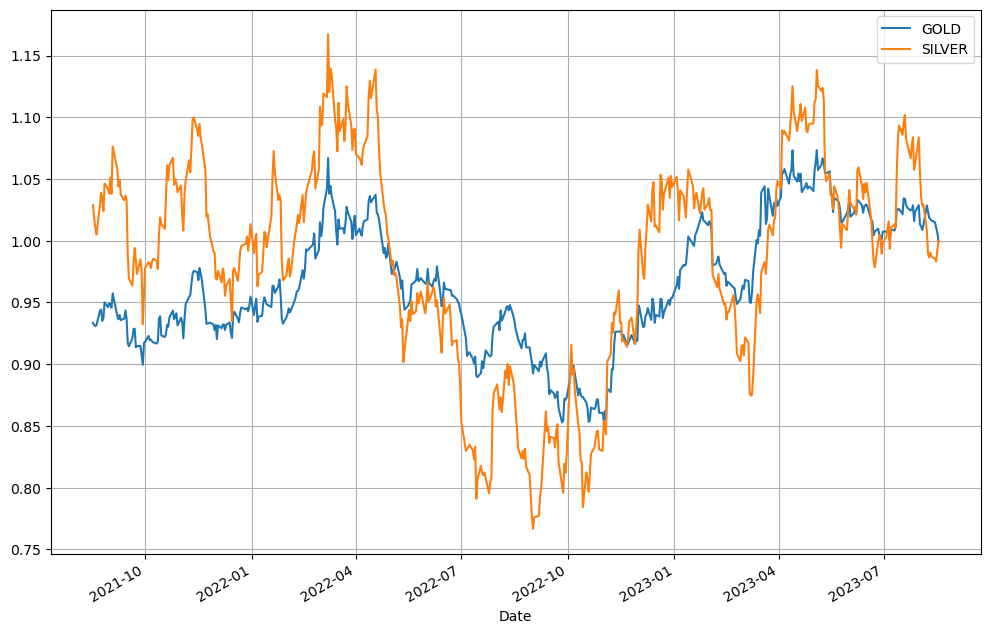

In [90]:
metal_ret=metal_close/metal_close.iloc[0]
metal_ret.plot(kind='line',figsize=(12,8),grid=True)
plt.legend(loc='best')

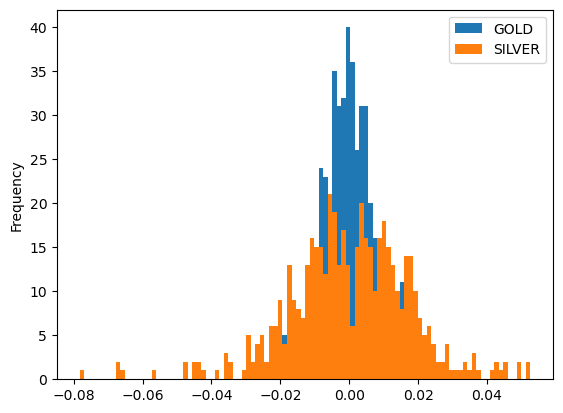

In [85]:
log_ret=np.log(metal_close/metal_close.shift(1))
log_ret.plot.hist(bins=100)
plt.legend(loc='best')

In [91]:
log_ret = log_ret.dropna()
log_ret.head()

,GOLD,SILVER
Date,,
2023-08-16,0.006817,-0.008105
2023-08-15,0.003572,-0.008789
2023-08-14,0.004537,0.002293
2023-08-11,0.001337,0.001540
2023-08-10,0.001181,0.003424


In [86]:
#The sum of the average logarithmic returns of 252 days
mean_ret=log_ret.mean()*252
#252 days of assets constitute a bias matrix
metal_covar=log_ret.cov()*252

In [87]:
print(mean_ret)
print(metal_covar)

GOLD     -0.034487
SILVER    0.014254
dtype: float64
            GOLD    SILVER
GOLD    0.021429  0.031393
SILVER  0.031393  0.081214


#### Applied Model 1A

In [102]:
from pulp import *

R = log_ret.to_numpy()
r = np.mean(R,axis=0)

# Define the data
n = 2  # Number of assets
T = len(R[:,0])  # Number of time periods
r0 = 0.0008
print(n,T,r0)


# Create a LP problem
prob = LpProblem("Medal_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob +=  - (1/T) * lpSum(y[t] for t in range(T)), "Objective"

# Define constraints
for t in range(T):
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

prob += lpSum(r[j] * x[j] for j in range(n)) == r0

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("expected return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value( (1/T) * lpSum(y[t] for t in range(T))))

2 503 0.0008
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/5971ccb3c7364b47b2e5cbac63627a94-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/5971ccb3c7364b47b2e5cbac63627a94-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1013 COLUMNS
At line 4539 RHS
At line 5548 BOUNDS
At line 5549 ENDATA
Problem MODEL has 1008 rows, 505 columns and 3022 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
Perturbing problem by 0.001% of 0.0047633501 - largest nonzero change 5.0050739e-06 ( 7.7540021%) - largest zero change 4.2407823e-06
0  Obj -0 Primal inf 1.4505539 (2)
95  Obj -0.044622333 Primal inf 1021.3805 (410)
190  Obj -0.10239253 Primal inf 664.035 (315)


## Gold + stocks together

### Define & download the list of assets

In [106]:
gold = pd.read_csv('gold prices.csv')

In [107]:
gold.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/17/2023,1915.2,146770.0,1922.4,1933.5,1914.2
1,08/16/2023,1928.3,124766.0,1933.1,1938.2,1922.0
2,08/15/2023,1935.2,161512.0,1939.4,1944.3,1927.5
3,08/14/2023,1944.0,117514.0,1945.6,1948.2,1934.2
4,08/11/2023,1946.6,119090.0,1944.9,1953.6,1942.7


In [108]:
# Convert 'Date' to Datetime
gold['Date'] = pd.to_datetime(gold['Date'])
gold = gold.set_index('Date')

In [109]:
gold.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-08-17,1915.2,146770.0,1922.4,1933.5,1914.2
2023-08-16,1928.3,124766.0,1933.1,1938.2,1922.0
2023-08-15,1935.2,161512.0,1939.4,1944.3,1927.5
2023-08-14,1944.0,117514.0,1945.6,1948.2,1934.2
2023-08-11,1946.6,119090.0,1944.9,1953.6,1942.7


In [110]:
gold.rename(columns={"Close/Last": "GOLD"}, inplace=True)

In [111]:
end_date = date(2023, 8, 17)
start_date = end_date - timedelta(days=2*365)

In [112]:
gold_close = gold['GOLD'].loc[end_date:start_date]
gold_close.drop(gold_close.index[0])

Date
2023-08-16    1928.3
2023-08-15    1935.2
2023-08-14    1944.0
2023-08-11    1946.6
2023-08-10    1948.9
               ...  
2021-08-23    1806.3
2021-08-20    1784.0
2021-08-19    1783.1
2021-08-18    1784.4
2021-08-17    1787.8
Name: GOLD, Length: 503, dtype: float64

In [113]:
stocks = ["AAPL","EA","MSFT","NFLX","GOOGL","TSLA"]

In [114]:
close = pd.DataFrame()
for s in stocks:
    data = yf.download(s, start=start_date, end=end_date)
    close[s] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [115]:
close

,AAPL,EA,MSFT,NFLX,GOOGL,TSLA
Date,,,,,,
2021-08-17,148.087982,138.843857,286.203522,518.909973,136.661499,221.903336
2021-08-18,144.311584,137.810242,284.452179,521.869995,135.449005,229.663330
2021-08-19,144.646820,138.410706,290.361755,543.710022,135.679993,224.490005
2021-08-20,146.116028,137.987427,297.787872,546.880005,137.429504,226.753326
2021-08-23,147.614731,140.596146,298.071625,553.330017,140.041504,235.433334
...,...,...,...,...,...,...
2023-08-10,177.269958,121.745636,321.001373,429.980011,129.690002,245.339996
2023-08-11,177.329803,121.675926,319.092865,421.660004,129.559998,242.649994
2023-08-14,178.995483,122.243492,322.104797,427.779999,131.330002,239.759995


In [116]:
df = pd.merge(gold_close, close, how='inner', on=['Date'])

In [117]:
df.head()

,GOLD,AAPL,EA,MSFT,NFLX,GOOGL,TSLA
Date,,,,,,,
2023-08-16,1928.3,176.112961,120.162460,319.160797,415.450012,128.699997,225.600006
2023-08-15,1935.2,176.990677,120.899284,319.937744,423.700012,129.779999,232.960007
2023-08-14,1944.0,178.995483,122.243492,322.104797,427.779999,131.330002,239.759995
2023-08-11,1946.6,177.329803,121.675926,319.092865,421.660004,129.559998,242.649994
2023-08-10,1948.9,177.269958,121.745636,321.001373,429.980011,129.690002,245.339996


Accumulative Return Rate:   

In portfolio optimization, we calculate the overall portfolio return by taking a weighted average of individual asset returns. With normal returns, this involves multiplication, which can be cumbersome for calculations involving multiple assets.

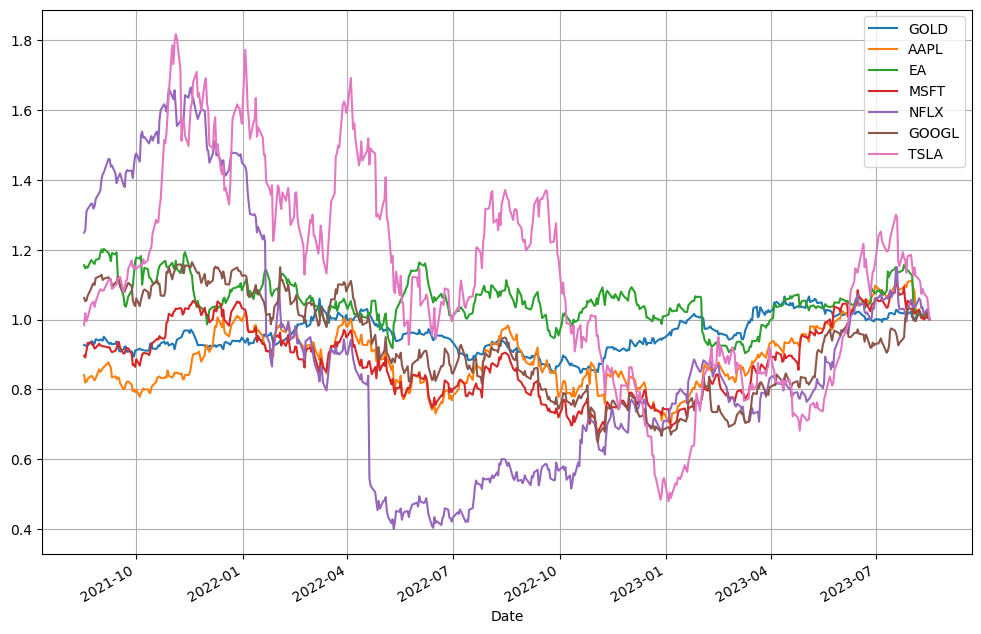

In [118]:
normed_ret=df/df.iloc[0]
normed_ret.plot(kind='line',figsize=(12,8),grid=True)
plt.legend(loc='best')

Transform to Log Return:   

Log Returns and Compounding: Logarithmic returns represent continuously compounded returns. This means you can simply add the log returns of individual assets over a period to get the total log return for the portfolio.

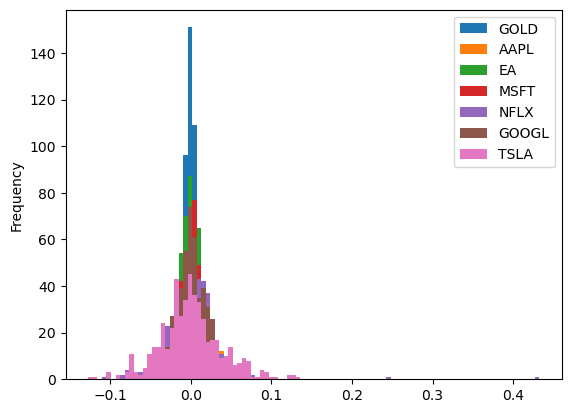

In [119]:
log_ret=np.log(df/df.shift(1))
log_ret.plot.hist(bins=100)
plt.legend(loc='best')

In [120]:
#The sum of the average logarithmic returns of 252 days
mean_ret=log_ret.mean()*252
#252 days of assets constitute a bias matrix
total_covar=log_ret.cov()*252

In [121]:
print(mean_ret)
print(total_covar)

GOLD    -0.037977
AAPL    -0.087005
EA       0.072541
MSFT    -0.054713
NFLX     0.111627
GOOGL    0.030131
TSLA    -0.008294
dtype: float64
           GOLD      AAPL        EA      MSFT      NFLX     GOOGL      TSLA
GOLD   0.021447 -0.000905  0.003586  0.001706  0.004844  0.002677 -0.002753
AAPL  -0.000905  0.088084  0.024548  0.067551  0.077231  0.071560  0.104472
EA     0.003586  0.024548  0.065822  0.025196  0.040499  0.031062  0.030008
MSFT   0.001706  0.067551  0.025196  0.095289  0.078010  0.081132  0.088319
NFLX   0.004844  0.077231  0.040499  0.078010  0.338569  0.086870  0.156093
GOOGL  0.002677  0.071560  0.031062  0.081132  0.086870  0.117033  0.094650
TSLA  -0.002753  0.104472  0.030008  0.088319  0.156093  0.094650  0.380881


#### Applied to model 2A

In [131]:
R = log_ret.to_numpy()
r = np.mean(R,axis=0)

In [132]:
S = total_covar.to_numpy()

In [133]:
sig = S

r0 = 0.0005
n = len(R[0,:])
e = np.ones((n,1))
rq = r.reshape(n,1)

X = cp.Variable((n,1))
Objective = cp.Minimize(cp.quad_form(X,sig))
constraints = [e.T@X == 1, X >= 0, rq.T@X >= r0]
problem = cp.Problem(Objective,constraints)

result = problem.solve()

print("expected portfolio", X.value.T)
print("expected return :", (rq.T @ X.value)[0] )
print("Mean variance:", (X.value.T @ sig @ X.value)[0] )

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


SolverError: Workspace allocation error!